In [2]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import statsmodels.api as sm

from statsmodels.tsa.arima_model import ARIMA

In [3]:
data = pd.read_csv('Data/my_PJME_MW.csv', index_col=[0], parse_dates=[0])

In [4]:
data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [5]:
data_m = data.resample('M').mean()

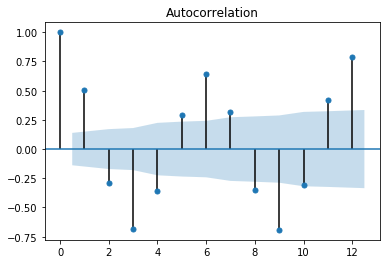

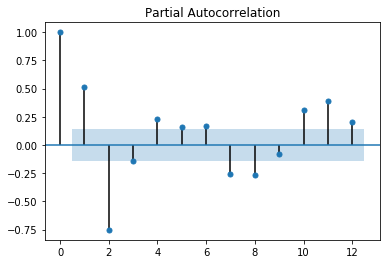

In [8]:
sm.graphics.tsa.plot_acf(data_m['PJME_MW'].values, lags=12)
plt.show()
sm.graphics.tsa.plot_pacf(data_m['PJME_MW'].values, lags=12)
plt.show()

Сезонность - 12. Остальные параметры подберем по сетке в диапозоне (0,3).

In [9]:
import warnings
import itertools
warnings.filterwarnings("ignore")

In [12]:
x = range(0,3)
pdq = list(itertools.product(x, x, x))

p=[0]
d=[0,1]
q=range(0,3)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [14]:
best_aic = np.inf
best_params = None
for param in pdq:
    for param_s in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-20],order=param,
                                    seasonal_order=param_s,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_params = (param, param_s)
        except:
            continue
best_aic, best_params

(2472.7524010047387, ((0, 1, 2), (0, 1, 2, 12)))

In [15]:
model = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-20],order=best_params[0],
                                    seasonal_order=best_params[1],
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
results = model.fit()

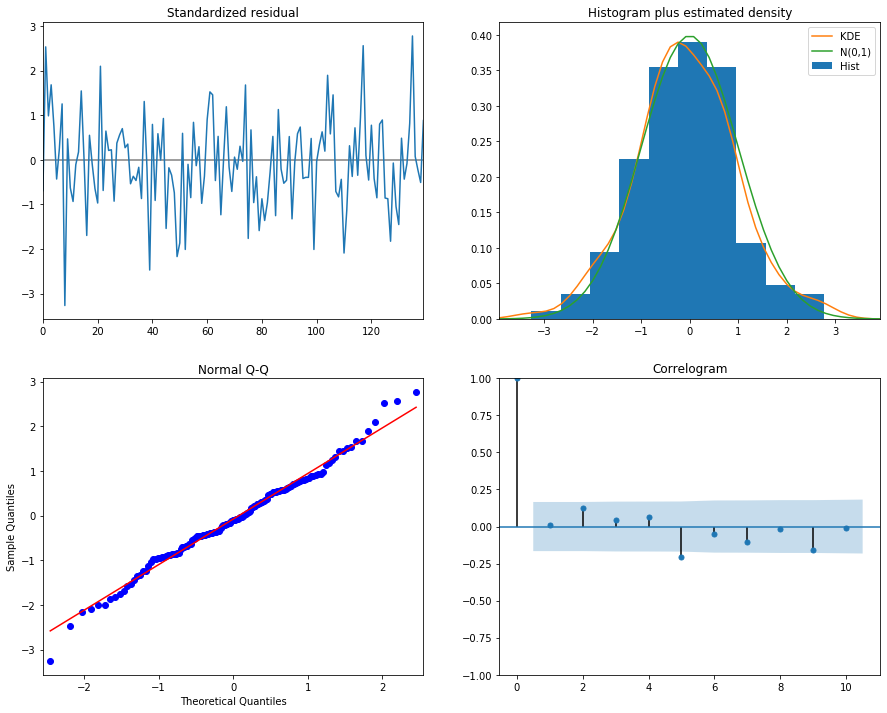

In [16]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

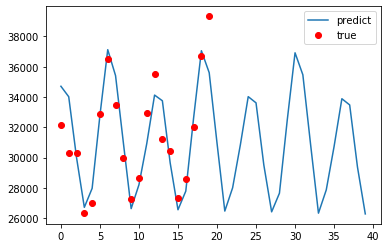

In [21]:
nforecast = 40

pred = results.forecast(nforecast)

plt.plot(pred, label='predict')
plt.plot(data_m['PJME_MW'].values[-20:], 'or', label='true')
plt.legend()

In [23]:
results.summary().tables[0]

Dep. Variable:,y,No. Observations:,180
Model:,"SARIMAX(0, 1, 2)x(0, 1, 2, 12)",Log Likelihood,-1231.376
Date:,"Tue, 16 Jun 2020",AIC,2472.752
Time:,12:30:31,BIC,2487.461
Sample:,0,HQIC,2478.729
,- 180,,
Covariance Type:,opg,,


In [24]:
results.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ma.L1,-0.6081,0.097,-6.277,0.000,-0.798,-0.418
ma.L2,-0.3448,0.091,-3.790,0.000,-0.523,-0.166
ma.S.L12,-0.7669,0.092,-8.315,0.000,-0.948,-0.586
ma.S.L24,0.0734,0.080,0.921,0.357,-0.083,0.230
sigma2,2.381e+06,2.71e+05,8.800,0.000,1.85e+06,2.91e+06


Качество модели получилось лучше чем на недельной выборке. Однако модель все еще не идеальна.

In [36]:
brent_data = pd.read_csv('Data/my_BRENT2019.csv', index_col=[0], parse_dates=[0])

In [37]:
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


In [38]:
brent_data_w = brent_data.resample('W').mean()

In [48]:
brent_data_w.loc[brent_data_w['Значение'].isna()]

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2011-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
brent_data_w['2011-10-02':'2011-10-30']

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2011-10-02,103.878333,2011.0,9.166667,23.666667,3.166667,271.666667,39.0,2.666667,0.0,0.000000,0.0
2011-10-09,103.476667,2011.0,10.000000,5.666667,4.000000,278.666667,40.0,2.666667,0.0,0.166667,0.0
2011-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-23,109.756667,2011.0,10.000000,21.333333,4.000000,294.333333,42.0,4.333333,0.0,0.000000,0.0
2011-10-30,110.680000,2011.0,10.000000,26.666667,4.000000,299.666667,43.0,2.666667,0.0,0.000000,0.0


In [54]:
brent_data_w.loc['2011-10-23']

Значение            109.756667
year               2011.000000
month                10.000000
dayofmonth           21.333333
quarter               4.000000
dayofyear           294.333333
weekofyear           42.000000
dayofweek             4.333333
is_holiday            0.000000
is_prev_holiday       0.000000
is_next_holiday       0.000000
Name: 2011-10-23 00:00:00, dtype: float64

In [56]:
brent_data_w.loc['2011-10-16']['Значение'] = (brent_data_w.loc['2011-10-09']['Значение'] + brent_data_w.loc['2011-10-23']['Значение'])/2

In [57]:
brent_data_w['2011-10-02':'2011-10-30']

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2011-10-02,103.878333,2011.0,9.166667,23.666667,3.166667,271.666667,39.0,2.666667,0.0,0.000000,0.0
2011-10-09,103.476667,2011.0,10.000000,5.666667,4.000000,278.666667,40.0,2.666667,0.0,0.166667,0.0
2011-10-16,106.616667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-23,109.756667,2011.0,10.000000,21.333333,4.000000,294.333333,42.0,4.333333,0.0,0.000000,0.0
2011-10-30,110.680000,2011.0,10.000000,26.666667,4.000000,299.666667,43.0,2.666667,0.0,0.000000,0.0


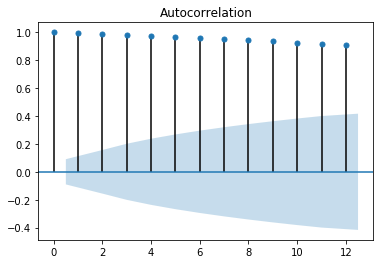

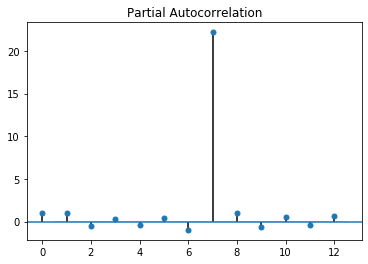

In [58]:
sm.graphics.tsa.plot_acf(brent_data_w['Значение'].values, lags=12)
plt.show()
sm.graphics.tsa.plot_pacf(brent_data_w['Значение'].values, lags=12)
plt.show()

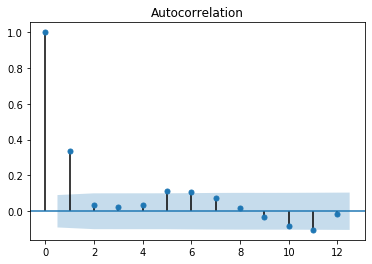

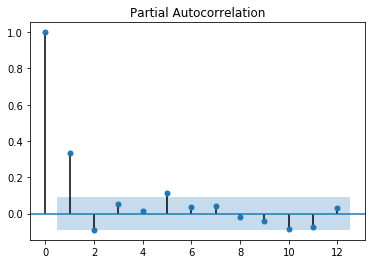

In [59]:
brent_dif = brent_data_w['Значение'].diff(1)

sm.graphics.tsa.plot_acf(brent_dif[1:], lags=12)
plt.show()
sm.graphics.tsa.plot_pacf(brent_dif[1:], lags=12)
plt.show()

In [66]:
p = 2
q = 1
d = 1
model = ARIMA(brent_data_w['Значение'].values[:-10], order=[p,d,q])
result = model.fit()

In [67]:
result.summary().tables[0]

Dep. Variable:,D.y,No. Observations:,459
Model:,"ARIMA(2, 1, 1)",Log Likelihood,-992.634
Method:,css-mle,S.D. of innovations,2.103
Date:,"Tue, 16 Jun 2020",AIC,1995.267
Time:,13:32:00,BIC,2015.913
Sample:,1,HQIC,2003.398
,,,


In [68]:
result.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
const,-0.0262,0.142,-0.185,0.854,-0.304,0.251
ar.L1.D.y,-0.2096,0.299,-0.700,0.484,-0.796,0.377
ar.L2.D.y,0.1088,0.130,0.836,0.403,-0.146,0.364
ma.L1.D.y,0.5891,0.291,2.022,0.044,0.018,1.160


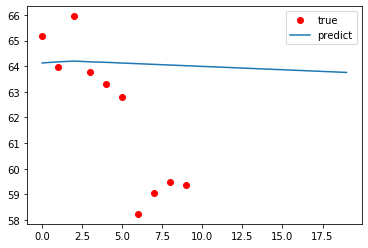

In [73]:
brent_pred = result.forecast(20)

plt.plot(brent_data_w['Значение'].values[-10:], 'or', label='true')
plt.plot(brent_pred[0], label='predict')
plt.legend()

In [74]:
brent_data_w.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 470 entries, 2010-09-05 to 2019-09-01
Freq: W-SUN
Data columns (total 11 columns):
Значение           470 non-null float64
year               469 non-null float64
month              469 non-null float64
dayofmonth         469 non-null float64
quarter            469 non-null float64
dayofyear          469 non-null float64
weekofyear         469 non-null float64
dayofweek          469 non-null float64
is_holiday         469 non-null float64
is_prev_holiday    469 non-null float64
is_next_holiday    469 non-null float64
dtypes: float64(11)
memory usage: 64.1 KB


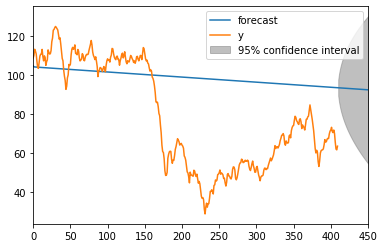

In [88]:
result.plot_predict(50, 500, dynamic=True)
plt.show()

В результате получили довольно плохо описывающую наши данные модель.
На 6ой вопрос к сожалению не знаю ответ.